In [16]:
import pandas as pd
import dppd, dppd_plotnine
dp, X = dppd.dppd()
import plotnine as p9

In [2]:
df = pd.read_html("nixR_generated_readme.md at main · TyberiusPrime_nixR.html")

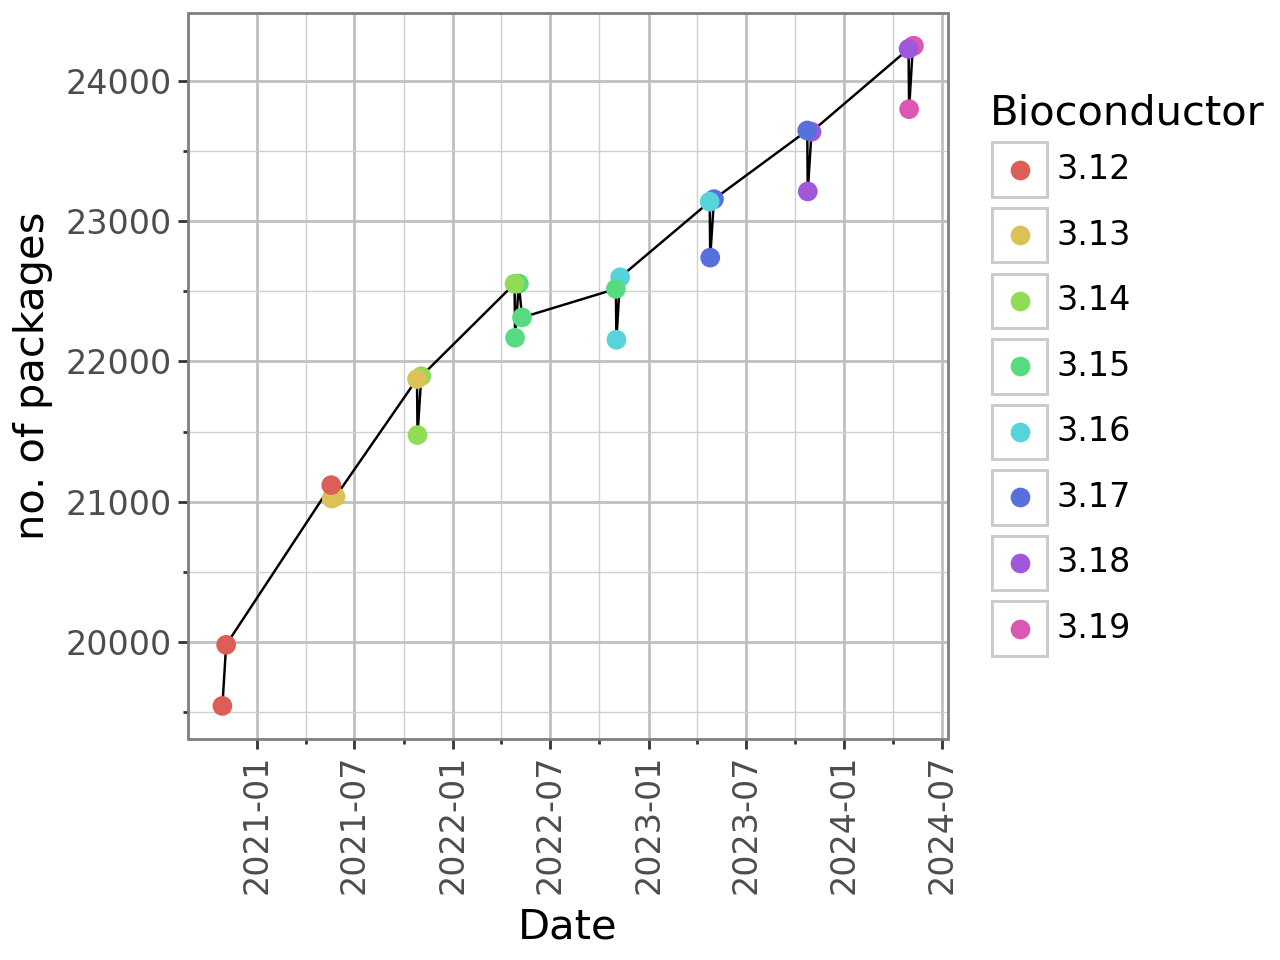

In [45]:
def month_format(x):
    return [y.strftime("%Y-%m") for y in x]
(dp(df[0])
 .assign(Date =pd.to_datetime(X.Date),
        total = 
         X['# Bioconductor'] + 
         X['# Bioconductor annotation'] + 
         X['# Bioconductor experiment'] + 
         X['# CRAN'],
         Bioconductor = X.Bioconductor.astype(str),
        )
 .p9()
 .theme_bw(base_size=15)
 .theme(
    panel_grid = p9.element_line(color='#C0C0C0'),
    panel_grid_minor = p9.element_line(color='#D0D0D0'),
    axis_ticks=p9.element_line(),        # turn on major & minor breaks
    axis_ticks_minor=p9.element_line() ,  # turn on minor breaks
    axis_ticks_minor_x=p9.element_line(), # turn on minor breaks for the x axis
    axis_ticks_minor_y=p9.element_line() ,# turn on minor breaks for the y axis
    )
 .add_line('Date', 'total', _group='x')
 #.add_line('Date', '# Missing', _group='y')
 .add_scatter('Date', 'total', color='Bioconductor', _size=3)
 .syc(name="no. of packages")
 .scale_x_datetime(
     labels=month_format,
     breaks=[
         "2021-01-01",
         "2021-07-01",
         "2022-01-01",
         "2022-07-01",
         "2023-01-01",
         "2023-07-01",
         "2024-01-01",
         "2024-07-01",
         
     
     ]
 )
 .turn_x_axis_labels()
 .render("nixR_growth.svg")
 .pd)

In [44]:
df[0]['# Missing'].median()

np.float64(256.0)